# Analysis of cheese colors

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import circlify

## Load data

In [163]:
df = pd.read_csv("cheeses.csv")
df["id"] = [i + 1 for i in df.index]
df.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers,id
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi,1
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN,2
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN,3
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN,4
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN,5


## Prepare data

In [164]:
#clean and standardise countries
dict = {"England, Great Britain, United Kingdom" : "United Kingdom",
        "England, Scotland, United Kingdom": "United Kingdom",
        "Great Britain, United Kingdom, Wales": "United Kingdom",
        "Great Britain, Scotland, United Kingdom": "United Kingdom",
        "England, Scotland, Wales": "United Kingdom",
        "United Kingdom, Wales": "United Kingdom",
        "Scotland, United Kingdom": "United Kingdom",
        "Great Britain": "United Kingdom",
        "Wales": "United Kingdom",
        "Scotland": "United Kingdom",
        "England": "United Kingdom",
        "Holland" : "Netherlands",
        "Cyprus, Egypt, Israel, Jordan, Lebanon, Middle East": "Cyprus, Egypt, Israel, Jordan, Lebanon",
        "Lebanon, Middle East": "Lebanon",
        "Middle East" : "",
        "Mexico and Caribbean": "Mexico",
        "China, Nepal, Tibet": "China",
        "China, Tibet": "China",
        "United Kingdom, United Kingdom": "United Kingdom"
}

df["country_dv"] = df["country"]
for key, value in dict.items():
    df["country_dv"] = df["country_dv"].str.replace(key, value)
df.loc[df["country_dv"]=="", "country_dv"] = np.nan

#summarise countries into 'Multiple' and 'Other' for small producers
df["country_dv2"] = df["country_dv"]
df.loc[df["country_dv2"].str.contains(",")==True, "country_dv2"] = "Multiple"
less_than_five = df["country_dv2"].value_counts()[df["country_dv2"].value_counts() < 5].index
df.loc[df["country_dv2"].isin(less_than_five), "country_dv2"] = "Other"

df["country_dv2"].value_counts()

United States     305
France            169
United Kingdom    168
Italy             141
Canada             65
Australia          53
Ireland            36
Other              35
Multiple           35
Germany            25
Netherlands        25
Spain              24
Switzerland        16
Austria            14
Sweden              9
Belgium             8
Mexico              8
Denmark             7
New Zealand         7
Portugal            7
Greece              6
India               6
Brazil              5
Name: country_dv2, dtype: int64

In [219]:
#clean colors and combine
df["color_dv"] = df["color"].str.replace("red", "orange").str.replace("pink and white", "white").str.replace("blue-grey", "blue")

color_hex = {'yellow' : "#FFE714",
            'ivory' : "#FEFEE6",
            'white' : "#FFFFFF",
            'pale yellow' : "#FFEE8F",
            'blue' : "#3A6981",
            'orange' : "#FFA333",
            'cream' : "#FFFDC7",
            'brown' :"#C58A43",
            'green': "#ACB03E" ,
            'golden yellow': "#FFD000",
            'pale white': "#F2F2F2",
            'straw' : "#E4CD6F",
            'brownish yellow': "#E2B95A",
            'golden orange': "#FFB400",
            }

color_group = {'yellow' : "yellow",
            'ivory' : "white",
            'white' : "white",
            'pale yellow' : "light yellow",
            'blue' : "other",
            'orange' : "orange/brown",
            'cream' : "light yellow",
            'brown' :"orange/brown",
            'green': "other" ,
            'golden yellow': "yellow",
            'pale white': "white",
            'straw' : "yellow",
            'brownish yellow': "yellow",
            'golden orange': "orange/brown",
            }


color_group_hex = {'yellow' : "#FFD000",
            'ivory' : "#FFFFFF",
            'white' : "#FFFFFF",
            'pale yellow' : "#FFEE8F",
            'blue' : "#9E9E9E",
            'orange' : "#FFA333",
            'cream' : "#FFEE8F",
            'brown' :"#FFA333",
            'green': "#9E9E9E" ,
            'golden yellow': "#FFD000",
            'pale white': "#FFFFFF",
            'straw' : "#FFD000",
            'brownish yellow': "#FFD000",
            'golden orange': "#FFA333",
            }


df["color_hex"] = df["color_dv"].map(color_hex)
df["color_group"] = df["color_dv"].map(color_group)
df["color_group_hex"] = df["color_dv"].map(color_group_hex)
df["color_group"].value_counts()

white           434
light yellow    356
yellow          191
orange/brown     37
other            27
Name: color_group, dtype: int64

## Explore

In [ ]:
df.columns

Index(['cheese', 'url', 'milk', 'country', 'region', 'family', 'type',
       'fat_content', 'calcium_content', 'texture', 'rind', 'color', 'flavor',
       'aroma', 'vegetarian', 'vegan', 'synonyms', 'alt_spellings',
       'producers', 'country_dv', 'country_dv2', 'color_dv', 'color_hex',
       'color_group'],
      dtype='object')

In [220]:
#cheese by color group + color

#remove missing
df_filtered = df.dropna(subset=["color_group", "country_dv"]).reset_index(drop=True)

data = []

for i, color_group in enumerate(df_filtered["color_group"].unique()):
    data.append({"id": color_group,
                 "hex": df_filtered[df_filtered["color_group"]==color_group]["color_group_hex"].unique()[0],
                "datum": df_filtered[df_filtered["color_group"]==color_group]["id"].count(),
                "children": []})
    
    for j, hex in enumerate(df_filtered[df_filtered["color_group"]==color_group]["color_hex"].unique()):
        data[i]["children"].append({"id": df_filtered[df_filtered["color_hex"]==hex]["color_dv"].unique()[0],
                                    "hex" : hex,
                                   "datum": df_filtered[df_filtered["color_hex"]==hex]["id"].count(),
                                   "children": []})
    
        #for k, cheese in enumerate(df_filtered[df_filtered["color_hex"]==hex]["cheese"].unique()):
         #   data[i]["children"][j]["children"].append({"id": cheese,
          #                                             "datum": 1
            # })

#

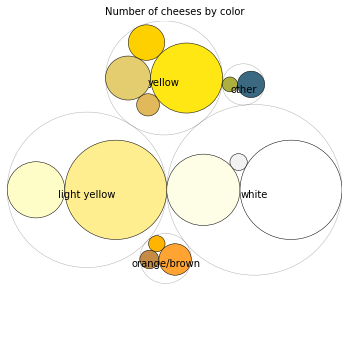

In [225]:
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(6, 6))

# Title
ax.set_title('Number of cheeses by color', fontsize=10)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circles for the highest level (color group):
for circle in circles:
    if circle.level != 1:
        continue
    color = circle.ex["hex"]
    label = circle.ex["id"]
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.3,
                 linewidth=0.5, color="None", ec="black"))
    plt.annotate(label, (x, y), ha='center', va="top", color="black")

# Print circles for the second level (color):
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    #label = circle.ex["id"]
    color = circle.ex["hex"]
    ax.add_patch(plt.Circle((x, y), r, alpha=1,
                 linewidth=0.5, color=color, ec="black"))
    #plt.annotate(label, (x, y), ha='center', color="white")